In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import struct
import socket
import sys
import subprocess
from ast import literal_eval
from time import time
from datetime import timedelta
from math import sqrt, log
import json

In [2]:
result =pd.read_csv(r"D:/Kanav/College/Thapar BE CSE/6th Sem/Capstone Project/Datasets/ISCX_dataset/Combined_ISCX.csv")
result

C:\Users\Kanav Chauhan\AppData\Local\Temp\ipykernel_13132\2631312641.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  result =pd.read_csv(r"D:/Kanav/College/Thapar BE CSE/6th Sem/Capstone Project/Datasets/ISCX_dataset/Combined_ISCX.csv")


,Unnamed: 0,generated,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,...,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Label
0,0,3/11/2014 18:21,Unknown_UDP,16076,0,0,178,NaN,NaN,NaN,...,NaN,NaN,192.168.5.122,udp_ip,5353,224.0.0.251,5353,6/13/2010 23:57,6/14/2010 0:11,Normal
1,1,3/11/2014 18:21,HTTPImageTransfer,384,0,0,6,NaN,NaN,NaN,...,"F,A",NaN,192.168.2.111,tcp_ip,4435,206.217.198.186,80,6/13/2010 23:58,6/14/2010 0:01,Normal
2,2,3/11/2014 18:21,DNS,171,642,4,2,NaN,NaN,NaN,...,NaN,NaN,192.168.4.119,udp_ip,4428,192.168.5.122,53,6/13/2010 23:58,6/13/2010 23:59,Normal
3,3,3/11/2014 18:21,HTTPImageTransfer,384,0,0,6,NaN,NaN,NaN,...,"F,A",NaN,192.168.4.119,tcp_ip,3639,219.94.203.105,80,6/13/2010 23:58,6/14/2010 0:00,Normal
4,4,3/11/2014 18:21,HTTPImageTransfer,186,128,2,2,NaN,NaN,NaN,...,"F,P,A",R,192.168.4.119,tcp_ip,3641,98.137.80.50,80,6/13/2010 23:58,6/13/2010 23:59,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071652,522258,3/11/2014 17:12,HTTPWeb,424,6264,6,6,R0VUIC9mYXEuaHRtbCBIVFRQLzEuMQ0KSG9zdDogc21hcn...,GET /faq.html HTTP/1.1Host: smart-c.jp,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUaHUsIDE3IEp1bi...,...,"S,P,A","S,P,A",192.168.2.107,tcp_ip,3469,125.6.164.51,80,6/16/2010 23:58,6/16/2010 23:58,Normal
2071653,522259,3/11/2014 17:12,HTTPWeb,495,3164,5,6,NaN,NaN,NaN,...,"F,S,P,A","F,S,P,A",192.168.1.105,tcp_ip,37221,203.73.24.75,80,6/16/2010 23:58,6/16/2010 23:58,Normal
2071654,522260,3/11/2014 17:12,DNS,91,288,1,1,54cBAAABAAAAAAABBGJsb2cHdHdpdHRlcgNjb20AAAEAAQ...,......blog.twitter.com..)..,54eBgAABAAMABAAFBGJsb2cHdHdpdHRlcgNjb20AAAEAAc...,...,NaN,NaN,192.168.5.122,udp_ip,24145,198.164.30.2,53,6/16/2010 23:58,6/16/2010 23:58,Normal
2071655,522261,3/11/2014 17:12,DNS,91,243,1,1,LnYBAAABAAAAAAABA2docwFsBmdvb2dsZQNjb20AAAEAAQ...,.v....ghs.l.google.com..)..,LnaBgAABAAEABAAFA2docwFsBmdvb2dsZQNjb20AAAEAAc...,...,NaN,NaN,192.168.5.122,udp_ip,10960,198.164.30.2,53,6/16/2010 23:58,6/16/2010 23:58,Normal


In [3]:
result.drop(axis=1, columns=["sourcePayloadAsBase64", "sourcePayloadAsUTF",
                                "destinationPayloadAsBase64", "destinationPayloadAsUTF"], inplace=True)
result.drop(axis=1, columns='generated', inplace=True)
result["source"] = result["source"].apply(
    lambda ip: struct.unpack("!I", socket.inet_aton(ip))[0]
)
result["destination"] = result["destination"].apply(
    lambda ip: struct.unpack("!I", socket.inet_aton(ip))[0]
)
def process_time(time):
    time = time.split(" ")[-1]
    h, m = time.split(":")
    return 3600*int(h)+60*int(m)


result["startDateTime"] = result["startDateTime"].apply(
    lambda time: process_time(time)
)

result["stopDateTime"] = result["stopDateTime"].apply(
    lambda time: process_time(time)
)
def flags_transform(flags):
    value = 0
    if type(flags) is str:
        flags = flags.replace(" ", "")
        for c in flags:
            if c != ',':
                value += ord(c)
    return value


result["sourceTCPFlagsDescription"] = result["sourceTCPFlagsDescription"].apply(
    lambda flags: flags_transform(flags)
)

result["destinationTCPFlagsDescription"] = result["destinationTCPFlagsDescription"].apply(
    lambda flags: flags_transform(flags)
)
result["protocolName"] = result["protocolName"].astype("category")
result["protocolName"] = result["protocolName"].cat.codes
result["appName"] = result["appName"].astype("category")
result["appName"] = result["appName"].cat.codes
result["direction"] = result["direction"].astype("category")
result["direction"] = result["direction"].cat.codes
attack_dict = {"Normal": 0, "Attack": 1}
result["Label"] = result["Label"].apply(
    lambda x: attack_dict[x]
)
result= result.fillna(0)

In [4]:
X=result.drop('Label',axis=1)
y=result['Label']

In [5]:
X.columns

Index(['Unnamed: 0', 'appName', 'totalSourceBytes', 'totalDestinationBytes',
       'totalDestinationPackets', 'totalSourcePackets', 'direction',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source',
       'protocolName', 'sourcePort', 'destination', 'destinationPort',
       'startDateTime', 'stopDateTime'],
      dtype='object')

In [6]:
X=X.drop('Unnamed: 0',axis=1)

In [7]:

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(X.to_numpy())
df0 = pd.DataFrame(df_scaled, columns=['appName', 'totalSourceBytes', 'totalDestinationBytes',
       'totalDestinationPackets', 'totalSourcePackets', 'direction',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source',
       'protocolName', 'sourcePort', 'destination', 'destinationPort',
       'startDateTime', 'stopDateTime'])

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df0,y , 
                                   random_state=104,  
                                   test_size=0.1,  
                                   shuffle=True) 

RNN

In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense,Dropout

In [21]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(None, 1)))
model.add(Dense(units=64))
model.add(Dropout(0.3))
model.add(Dense(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=20, batch_size=128)

loss, accuracy = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)

C:\Users\shiya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step - accuracy: 0.9899 - loss: 0.0266
Epoch 2/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9963 - loss: 0.0120
Epoch 3/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - accuracy: 0.9963 - loss: 0.0113
Epoch 4/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 102s 7ms/step - accuracy: 0.9965 - loss: 0.0104
Epoch 5/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 97s 7ms/step - accuracy: 0.9964 - loss: 0.0108
Epoch 6/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 99s 7ms/step - accuracy: 0.9964 - loss: 0.0105
Epoch 7/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 106s 7ms/step - accuracy: 0.9964 - loss: 0.0102
Epoch 8/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 128s 9ms/step - accuracy: 0.9965 - loss: 0.0103
Epoch 9/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 120s 8ms/step - accuracy: 0.9965 - loss: 0.0102
Epoch 10/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 121s 8ms/step - accuracy: 0.9964 - loss: 0.0100
Epoch 11/20
14567/14567 ━━━━━━━━━━━━━━━━━━━━ 112s 8ms/step - accuracy: 0.9965 - loss

In [22]:
predictions = (predictions > 0.5).astype(int)

In [23]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 99.5848739658052
f1score 93.93511988716502


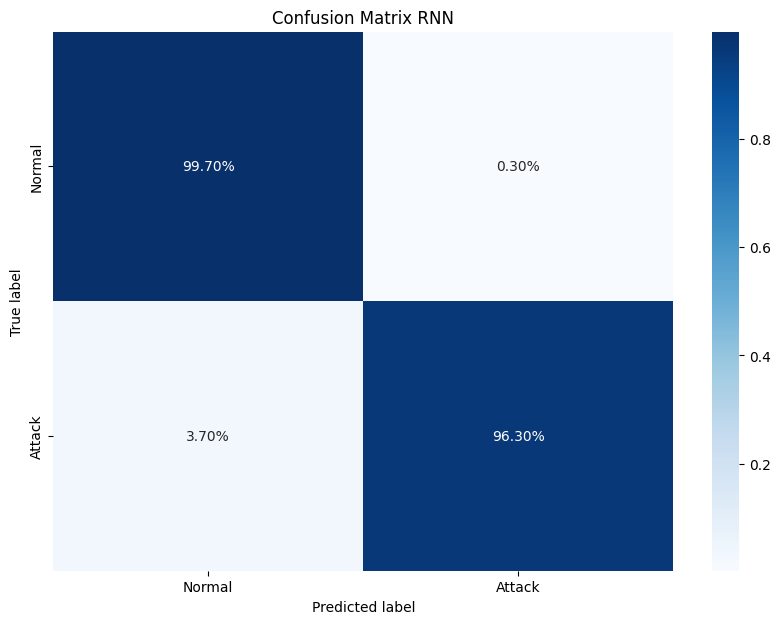

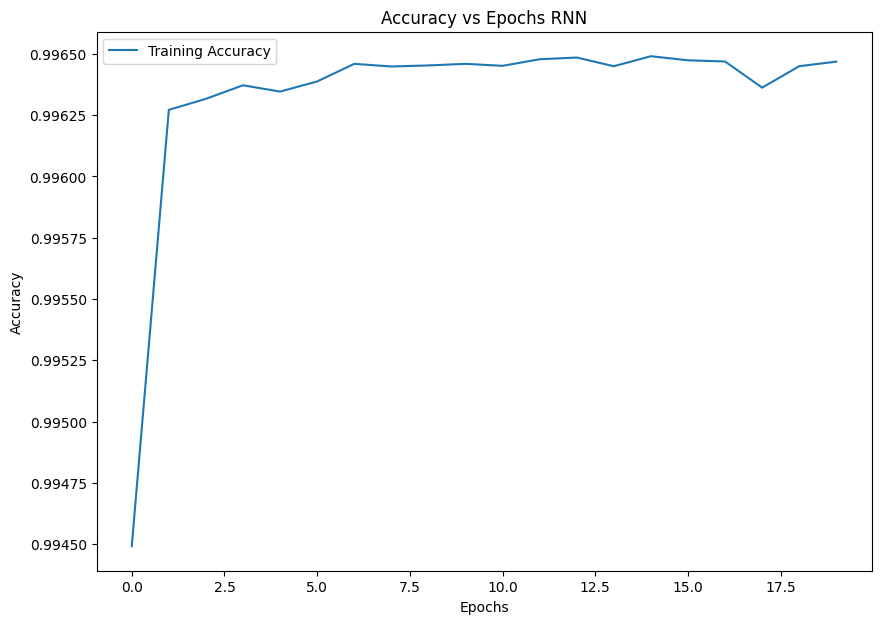

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix RNN')
plt.show()


# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs RNN')
plt.legend()
plt.show()

accuracy 99.64907368969811
f1score 94.920701460211

# Attention RNN

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dense, Concatenate, Dot, Activation
import numpy as np

class AttentionRNN(Model):
    def __init__(self, units):
        super(AttentionRNN, self).__init__()
        self.units = units
        self.rnn = SimpleRNN(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # RNN output and hidden state calculation
        outputs, state = self.rnn(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
rnn_layer = AttentionRNN(units)
outputs = rnn_layer(inputs)

# Define output layer
outputs = Dense(1, activation='sigmoid')(outputs)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=512)


Epoch 1/20
3642/3642 [==============================] - 15s 4ms/step - loss: 0.0257 - accuracy: 0.9926
Epoch 2/20
3642/3642 [==============================] - 13s 4ms/step - loss: 0.0125 - accuracy: 0.9960
Epoch 3/20
3642/3642 [==============================] - 13s 4ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 4/20
3642/3642 [==============================] - 15s 4ms/step - loss: 0.0109 - accuracy: 0.9963
Epoch 5/20
3642/3642 [==============================] - 44s 12ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 6/20
3642/3642 [==============================] - 43s 12ms/step - loss: 0.0102 - accuracy: 0.9964
Epoch 7/20
3642/3642 [==============================] - 55s 15ms/step - loss: 0.0102 - accuracy: 0.9964
Epoch 8/20
3642/3642 [==============================] - 58s 16ms/step - loss: 0.0098 - accuracy: 0.9965
Epoch 9/20
3642/3642 [==============================] - 45s 12ms/step - loss: 0.0096 - accuracy: 0.9965
Epoch 10/20
3642/3642 [==============================] - 43s 12ms/st

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

6474/6474 [==============================] - 28s 4ms/step
accuracy 99.68527654151742
f1score 95.41232761047003


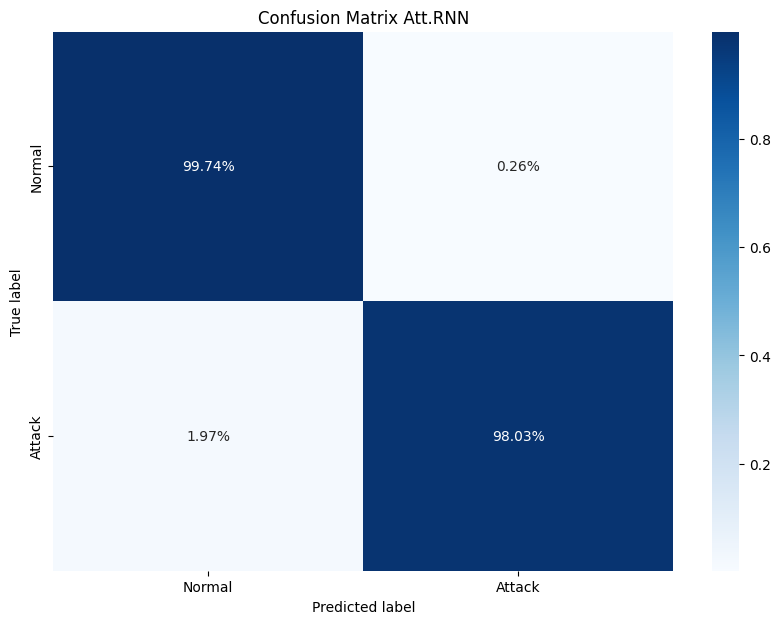

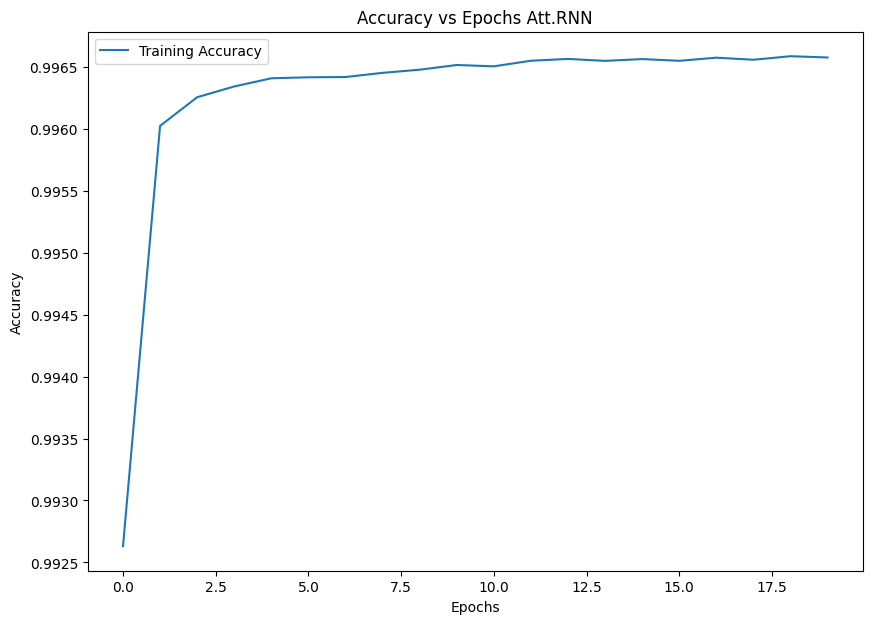

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Att.RNN')
plt.show()


# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs Att.RNN')
plt.legend()
plt.show()

accuracy 99.65776237413475
f1score 95.09376513736075

LSTM

In [36]:
# Import necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import numpy as np

# Define the model architecture
model = Sequential()
model.add(LSTM(units=16, input_shape=(None, 1)))
model.add(Dense(units=32))
model.add(Dense(units=64))
model.add(Dropout(0.4))
model.add(Dense(units=32))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=128)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions using the model
predictions = model.predict(X_test)


Epoch 1/20
14567/14567 [==============================] - 121s 8ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 2/20
14567/14567 [==============================] - 134s 9ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 3/20
14567/14567 [==============================] - 215s 15ms/step - loss: 0.0117 - accuracy: 0.9960
Epoch 4/20
14567/14567 [==============================] - 204s 14ms/step - loss: 0.0108 - accuracy: 0.9962
Epoch 5/20
14567/14567 [==============================] - 209s 14ms/step - loss: 0.0100 - accuracy: 0.9964
Epoch 6/20
14567/14567 [==============================] - 234s 16ms/step - loss: 0.0096 - accuracy: 0.9964
Epoch 7/20
14567/14567 [==============================] - 628s 43ms/step - loss: 0.0094 - accuracy: 0.9964
Epoch 8/20
14567/14567 [==============================] - 183s 13ms/step - loss: 0.0091 - accuracy: 0.9965
Epoch 9/20
14567/14567 [==============================] - 219s 15ms/step - loss: 0.0089 - accuracy: 0.9965
Epoch 10/20
14567/14567 [==============

In [37]:
predictions = (predictions > 0.5).astype(int)
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 99.69493063533591
f1score 95.5779457038903


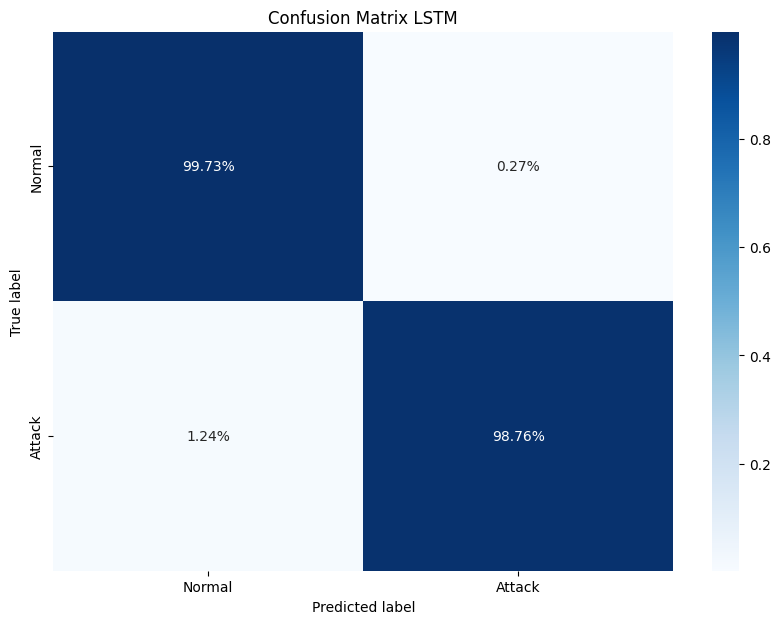

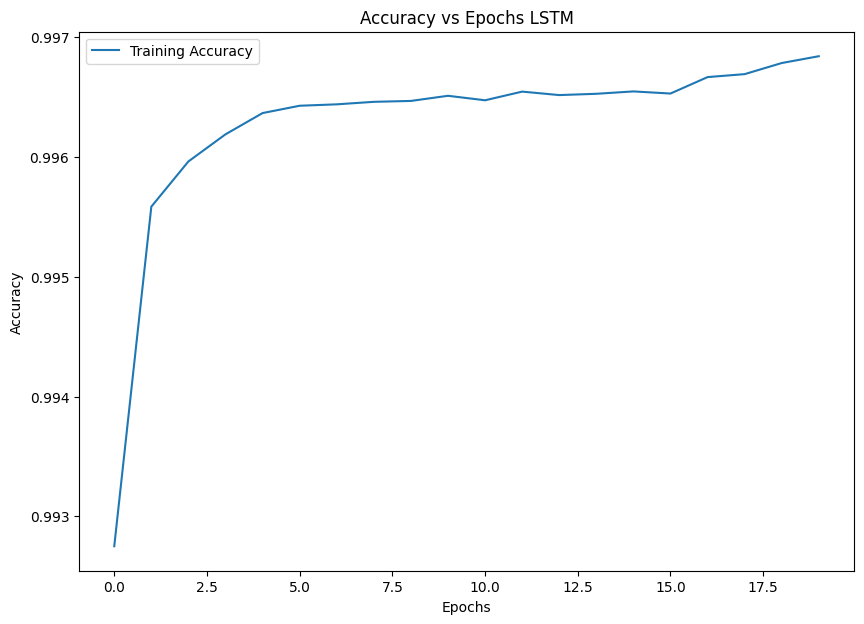

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix LSTM')
plt.show()


# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs LSTM')
plt.legend()

accuracy 99.76781904366547
f1score 96.5467729198076

Attention Lstm

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dot, Activation
import numpy as np

class AttentionLSTM(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLSTM, self).__init__()
        self.units = units
        self.rnn = LSTM(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs, training=None):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # RNN output and hidden state calculation
        outputs, state_h, state_c = self.rnn(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state_h, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
attention_lstm_layer = AttentionLSTM(units)
context_vector = attention_lstm_layer(inputs)

# Define output layer
outputs = Dense(1, activation='sigmoid')(context_vector)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and y_train are predefined
# X_train shape should be (num_samples, sequence_length, input_dim)
# y_train shape should be (num_samples,)

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=512)


Epoch 1/20
3642/3642 [==============================] - 123s 33ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 2/20
3642/3642 [==============================] - 203s 56ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 3/20
3642/3642 [==============================] - 107s 29ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 4/20
3642/3642 [==============================] - 235s 65ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 5/20
3642/3642 [==============================] - 236s 65ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 6/20
3642/3642 [==============================] - 193s 53ms/step - loss: 0.0102 - accuracy: 0.9964
Epoch 7/20
3642/3642 [==============================] - 176s 48ms/step - loss: 0.0099 - accuracy: 0.9964
Epoch 8/20
3642/3642 [==============================] - 182s 50ms/step - loss: 0.0095 - accuracy: 0.9964
Epoch 9/20
3642/3642 [==============================] - 178s 49ms/step - loss: 0.0093 - accuracy: 0.9965
Epoch 10/20
3642/3642 [==============================] 

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

6474/6474 [==============================] - 25s 4ms/step
accuracy 99.78423100315689
f1score 96.83853172077234


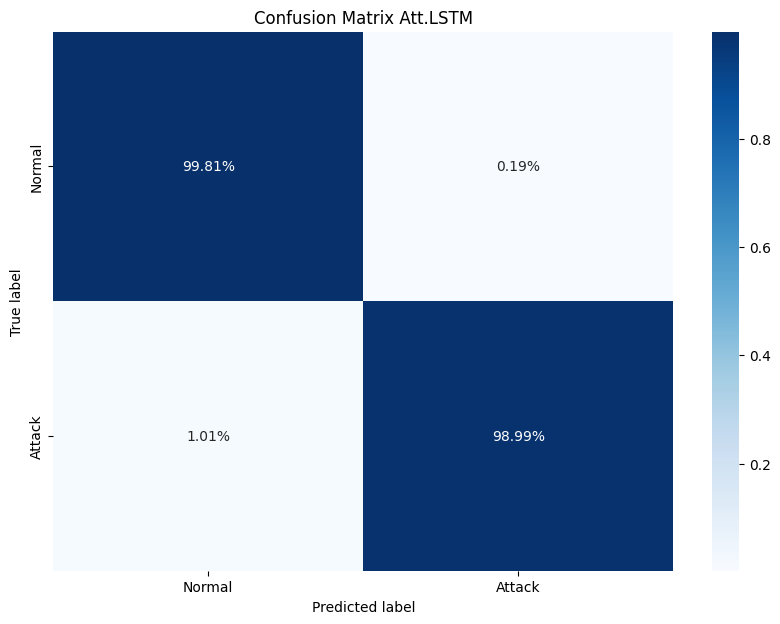

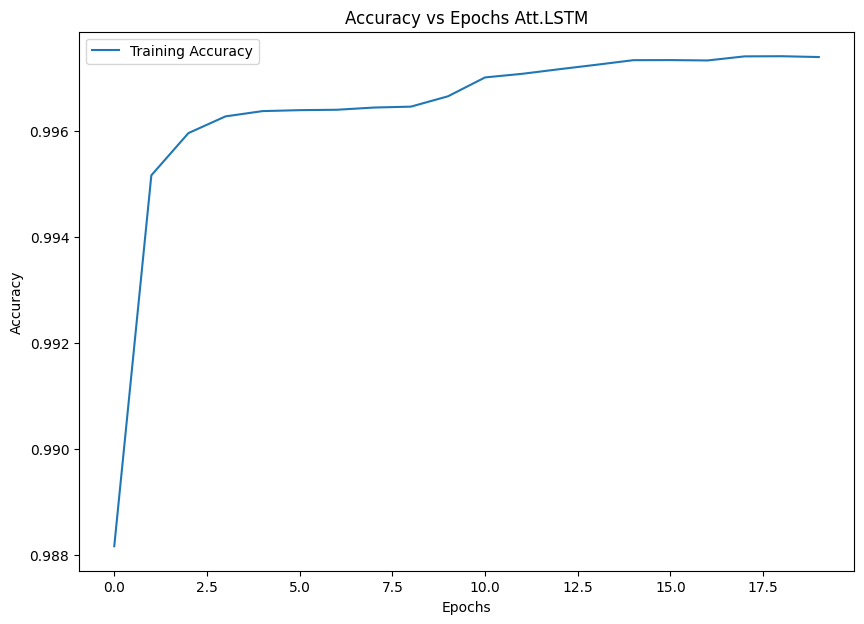

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Att.LSTM')
plt.show()


# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs Att.LSTM')
plt.legend()

accuracy 99.66017589758937
f1score 95.12600387704236

GRU

In [45]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
# Define the model architecture
model = Sequential()
model.add(GRU(units=32, input_shape=(None, 1)))
model.add(Dense(units=64))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
# Train the model with early stopping
history=model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
# Make predictions using the model
predictions = model.predict(X_test)

Epoch 1/20
14567/14567 [==============================] - 422s 29ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0108 - val_accuracy: 0.9962
Epoch 2/20
14567/14567 [==============================] - 421s 29ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0091 - val_accuracy: 0.9965
Epoch 3/20
14567/14567 [==============================] - 278s 19ms/step - loss: 0.0092 - accuracy: 0.9965 - val_loss: 0.0065 - val_accuracy: 0.9974
Epoch 4/20
14567/14567 [==============================] - 230s 16ms/step - loss: 0.0072 - accuracy: 0.9971 - val_loss: 0.0065 - val_accuracy: 0.9974
Epoch 5/20
14567/14567 [==============================] - 241s 17ms/step - loss: 0.0066 - accuracy: 0.9972 - val_loss: 0.0065 - val_accuracy: 0.9973
Epoch 6/20
14567/14567 [==============================] - 231s 16ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 0.0060 - val_accuracy: 0.9977
Epoch 7/20
14567/14567 [==============================] - 158s 11ms/step - loss: 0.0061 - accuracy: 0.9974

In [46]:

predictions = (predictions > 0.5).astype(int)
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 99.78326559377504
f1score 96.8054073283529


accuracy 99.64859098500719
f1score 94.90410191796164

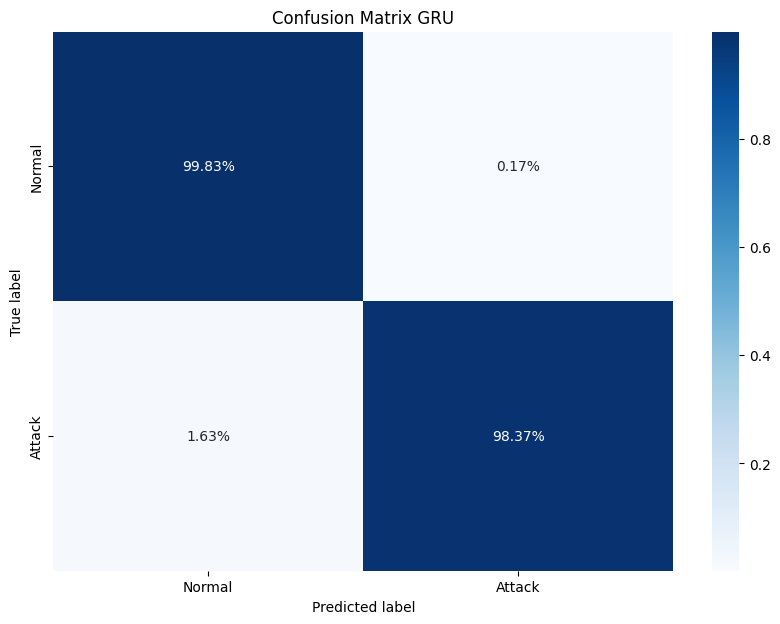

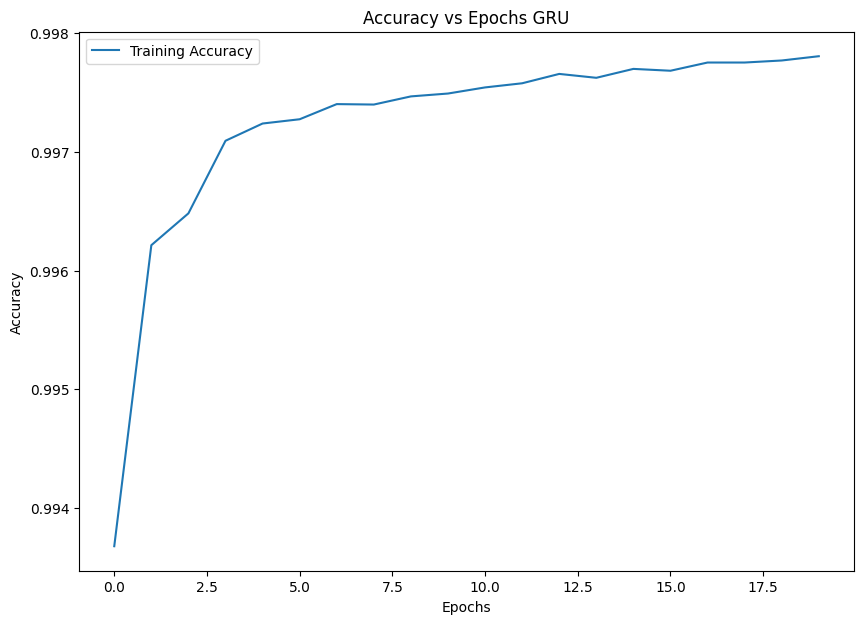

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix GRU')
plt.show()


# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs GRU')
plt.legend()

# Attention GRU

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate, Dot, Activation
import numpy as np

class AttentionGRU(Model):
    def __init__(self, units):
        super(AttentionGRU, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # GRU output and hidden state calculation
        outputs, state = self.gru(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
gru_layer = AttentionGRU(units)
outputs = gru_layer(inputs)

# Define output layer
outputs = Dense(1, activation='sigmoid')(outputs)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=512)
loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)




Epoch 1/20


3642/3642 [==============================] - 118s 31ms/step - loss: 0.0348 - accuracy: 0.9889
Epoch 2/20
3642/3642 [==============================] - 110s 30ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 3/20
3642/3642 [==============================] - 111s 31ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 4/20
3642/3642 [==============================] - 110s 30ms/step - loss: 0.0104 - accuracy: 0.9963
Epoch 5/20
3642/3642 [==============================] - 111s 30ms/step - loss: 0.0093 - accuracy: 0.9964
Epoch 6/20
3642/3642 [==============================] - 110s 30ms/step - loss: 0.0077 - accuracy: 0.9969
Epoch 7/20
3642/3642 [==============================] - 109s 30ms/step - loss: 0.0071 - accuracy: 0.9970
Epoch 8/20
3642/3642 [==============================] - 112s 31ms/step - loss: 0.0068 - accuracy: 0.9971
Epoch 9/20
3642/3642 [==============================] - 114s 31ms/step - loss: 0.0067 - accuracy: 0.9972
Epoch 10/20
3642/3642 [===========================

In [10]:
model.save('gru_attention.h5')

D:\SOFTWARE\Installs\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
predictions = (predictions > 0.5).astype(int)
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 99.79485050635722
f1score 96.93251533742331


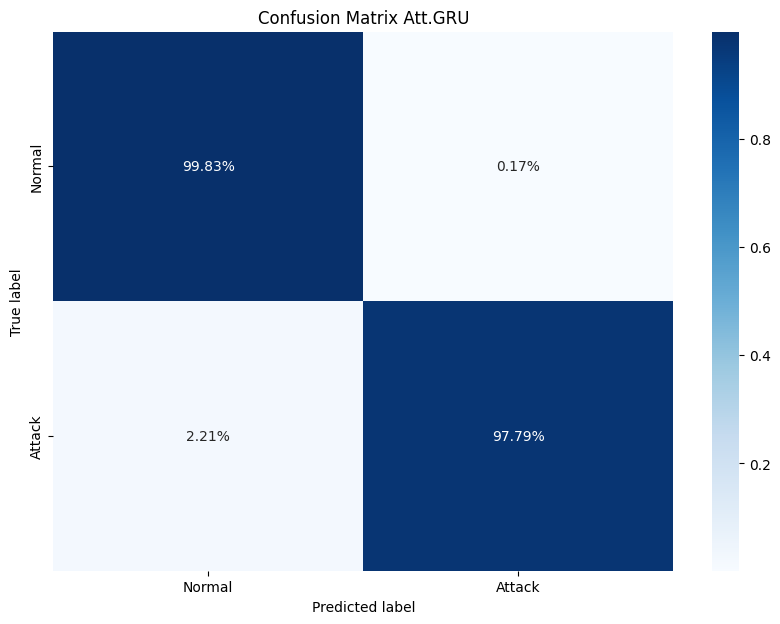

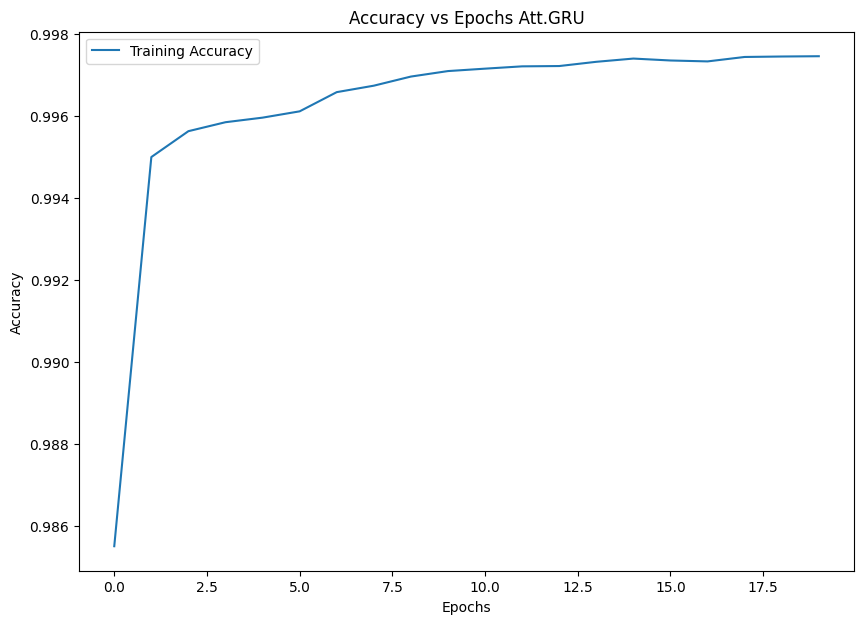

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Att.GRU')
plt.show()


# Plot accuracy vs epochs
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs Att.GRU')
plt.legend()

accuracy 99.74271839973741
f1score 96.22173389097611

In [2]:
from PIL import Image
import os

# Path to the folder containing the images
folder_path = r"C:\Users\shiya\Desktop\Learning\Capstone\Iscx Attention Models\ConfusionMatrix"

# Get a list of all image file names in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Sort the image files (optional)
image_files.sort()

# Load the images
images = [Image.open(os.path.join(folder_path, img)) for img in image_files]

# Determine the size of each image (assuming all images are the same size)
img_width, img_height = images[0].size

# Calculate the size of the final combined image
rows = 3
cols = 2
combined_width = cols * img_width
combined_height = rows * img_height

# Create a new blank image with the calculated size
combined_image = Image.new('RGB', (combined_width, combined_height))

# Paste each image into the combined image
for i, img in enumerate(images):
    x = (i % cols) * img_width
    y = (i // cols) * img_height
    combined_image.paste(img, (x, y))

# Save the combined image
combined_image.save(os.path.join(folder_path, 'combined_image.jpg'))
combined_image.show()


# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN model with the desired number of neighbors (k)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

In [12]:
import pickle

In [11]:
knn_model.save('knn.pkl')

AttributeError: 'KNeighborsClassifier' object has no attribute 'save'

In [13]:
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [ ]:
predictions = (predictions > 0.5).astype(int)
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))